<a href="https://colab.research.google.com/github/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/blob/master/NNFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time
from tabulate import tabulate
from scipy import stats
import math

In [2]:
# function to compute hypothesis
def hypothesis(X ,weight):
  hyp = []
  for i in range(len(X)):
      hyp.append(weight[0] + weight[1] * X[i,1] + weight[2] * X[i,2])
  return np.array(hyp)

def sum(X , Y ,weight):
  sum = np.zeros((3,1))
  hyp = hypothesis(X , weight)
  for i in range(len(X)):
    sum[0] = sum[0] + (hyp[i] - Y[i])
    sum[1] = sum[1] + (hyp[i] - Y[i])*X[i,1]
    sum[2] = sum[2] + (hyp[i] - Y[i])*X[i,2]
  return np.array(sum)

# function to compute the cost for current values of weight
def cost(X, y, weight): 
    h = hypothesis(X, weight) 
    J = 0.5*np.sum((h-y)**2)
    return J

# function to compute Mean Squared Error
def mse(Y_pred , Y):
  mse = np.sum((Y_pred - Y)**2)/len(Y)
  return mse

# function to compute cost in ridge regression
def cost_ridge(X, y, weight ,lmbda=0.25):
  h = hypothesis(X, weight)
  J = 0.5*(np.sum((h-y)**2) + lmbda*np.sum(weight**2))
  return J

# function to compute cost in least angle regression
def cost_LAR(X, y, weight ,lmbda=0.25):
  h = hypothesis(X, weight)
  J = 0.5*(np.sum((h-y)**2)) + lmbda*np.sum(np.absolute(weight))
  return J

**1. Implement the linear regression algorithm to estimate the weight parameters. You can use batch gradient descent algorithm for the implementation. (a) Plot the cost function vs the number of iterations. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf graph (w= [w0 w1 w2]). (c) Evaluate the mean square error between the actual test output and predicted test output. Please use the files such as Training feature matrix, training output vector, test feature matrix, test output vector for this question (Use for or while loop for the implementation of linear regression).**

The final cost function value after applying linear regression using batch gradient descent = 113.31720275790774


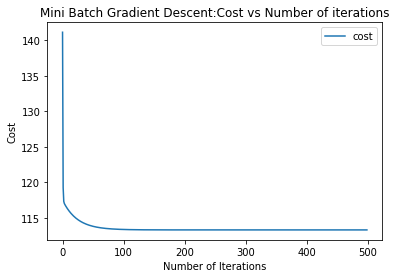

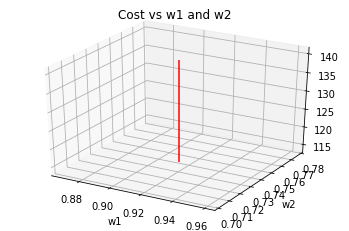


MSE = 40.22500756397695


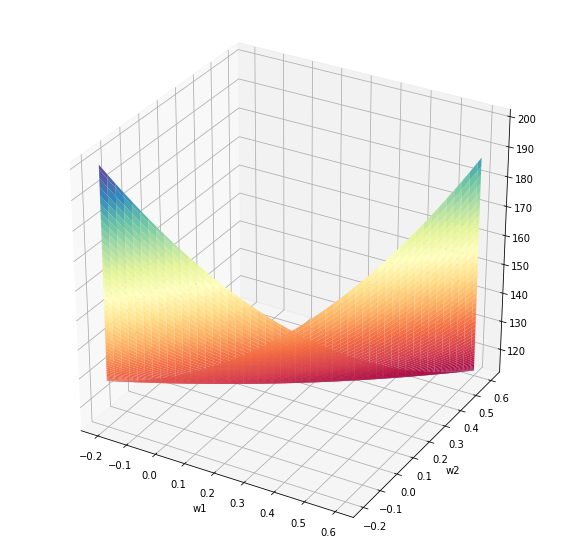

In [3]:
X_train = np.array(pd.read_csv("https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/training_feature_matrix.csv" ,header = None))
Y_train = np.array(pd.read_csv("https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/training_output.csv")).reshape(-1,1)

X_test = np.array(pd.read_csv("https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/test_feature_matrix.csv"  ,header = None))
Y_test = np.array(pd.read_csv("https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/test_output.csv" ,header = None)).reshape(-1,1)

# Normalisation

X_train_normalised = ((X_train) - np.mean(X_train))/np.std(X_train)
Y_train_normalised = ((Y_train)  - np.mean(Y_train))/np.std(Y_train)

X_test_normalised = ((X_test) - np.mean(X_train))/np.std(X_train)
Y_test_normalised = ((X_test)  - np.mean(Y_train))/np.std(Y_train)

# Adding a column vector of ones to training and testing feature matrix

X_train_normalised  = np.c_[ np.ones(len(X_train_normalised)), X_train_normalised]
X_test_normalised =  np.c_[ np.ones(len(X_test_normalised)), X_test_normalised]

# function to perform batch gradient descent 
def batch_gradient_descent(X, Y, learning_rate = 0.001, iterations = 500):

  weight = np.random.random((X.shape[1],1)) 

  cost_list = []
  w0 = []
  w1 = []
  w2 = [] 
  
  for i in range(iterations):
    w0.append(weight[0])
    w1.append(weight[1])
    w2.append(weight[2])
    cost_list.append(cost(X, Y, weight)) 

    sum_temp = sum(X,Y,weight)

    weight[0] = weight[0] - learning_rate * sum_temp[0]
    weight[1] = weight[1] - learning_rate * sum_temp[1]
    weight[2] = weight[2] - learning_rate * sum_temp[2]
  
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)


# calling batch gradient descent function
weight , cost_list , w0 , w1 , w2 = batch_gradient_descent(X_train_normalised , Y_train_normalised)
LR_bgd = weight

# Final Cost after linear regression using batch gradient descent
print("The final cost function value after applying linear regression using batch gradient descent = " +str(cost(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iterations
plt.plot(cost_list , label = "cost")
plt.title("Mini Batch Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_LR_bgd = mse(Y_pred , Y_test)
print ("\nMSE = " + str(mse_LR_bgd))

#Surface plot
#Taking weights at uniform interval with range upto 100

w1 = np.linspace(-0.2, 0.6, 100)
w2 = np.linspace(-0.2, 0.6, 100)
J_v = np.zeros((w1.shape[0],w2.shape[0]))

for i in range(100):
  for j in range(100):
    t=np.array([0,w1[i],w2[j]])
    t=t.reshape(3,1)
    J_v[i][j]=cost(X_train_normalised,Y_train_normalised,t)

fig = plt.figure(figsize =(10, 10)) 
ax = plt.axes(projection ='3d') 
ax.plot_surface(w1,w2, J_v,cmap = "Spectral")
plt.ylabel('w2')
plt.xlabel('w1')
plt.show()


**2. Implement mini-batch and stochastic gradient descent algorithms for the linear
regression problem in question number 1. (a) Plot the cost function vs the number of
iterations. (b) Plot the cost function vs w1 and w2. (c) Evaluate the mean square error
between the actual test output and predicted test output. Please use the same data files as
in question number 1 (Use for or while loop for the implementation)**

The final cost function value after applying linear regression using mini batch gradient descent = 113.53402716658334


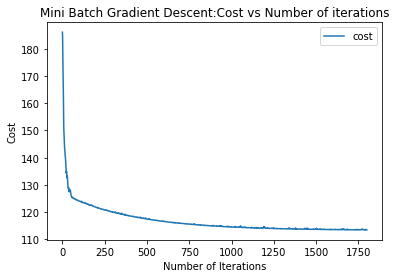

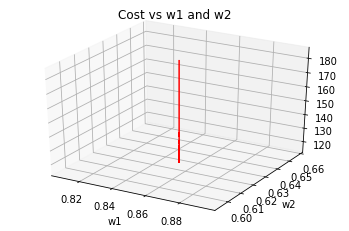


MSE = 40.939805097487614


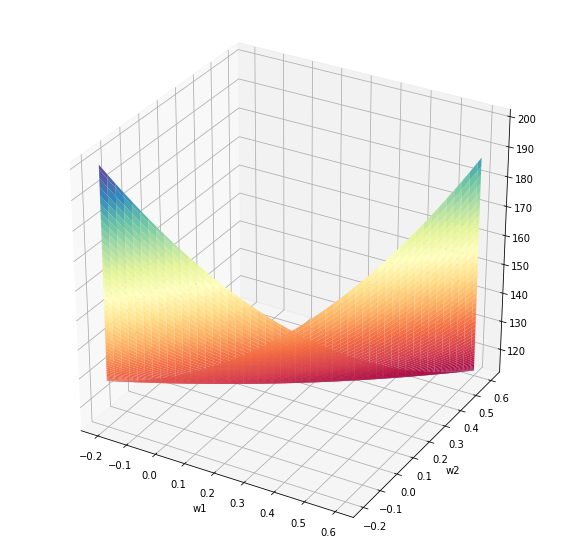

In [4]:
# function to create a list containing mini-batches 
def create_mini_batches(X, Y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, Y)) 
    np.random.shuffle(data) 
    n_minibatches = int(data.shape[0] / batch_size) 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

# function to perform mini-batch gradient descent 
def mini_batch_gradient_descent(X, Y, learning_rate = 0.001 , iteration=50 , batch_size = 32):
  np.random.seed(15)
  weight = np.random.random((X.shape[1], 1)) 
  cost_list = [] 

  w0 = []
  w1 = []
  w2 = [] 

  for i in range(iteration):
    mini_batches = create_mini_batches(X, Y, batch_size)

    for mini_batch in mini_batches:
      X_mini, Y_mini = mini_batch
      w0.append(weight[0])
      w1.append(weight[1])
      w2.append(weight[2])
      cost_list.append(cost(X, Y, weight)) 

      sum_temp = sum(X_mini,Y_mini,weight)

      weight[0] = weight[0] - learning_rate * sum_temp[0]
      weight[1] = weight[1] - learning_rate * sum_temp[1]
      weight[2] = weight[2] - learning_rate * sum_temp[2] 
              
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling mini batch gradient descent function
weight , cost_list , w0 , w1 , w2 = mini_batch_gradient_descent(X_train_normalised , Y_train_normalised ,iteration=100 , batch_size= 15)
LR_mbgd = weight

# Final Cost after linear regression using mini batch gradient descent
print("The final cost function value after applying linear regression using mini batch gradient descent = " +str(cost(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iterations
plt.plot(np.array(cost_list) , label = "cost")
plt.title("Mini Batch Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_LR_mbgd = mse(Y_pred , Y_test)

print ("\nMSE = " + str(mse_LR_mbgd))


#Surface plot
#Taking weights at uniform interval with range upto 100

w1 = np.linspace(-0.2, 0.6, 100)
w2 = np.linspace(-0.2, 0.6, 100)
J_v = np.zeros((w1.shape[0],w2.shape[0]))

for i in range(100):
  for j in range(100):
    t=np.array([0,w1[i],w2[j]])
    t=t.reshape(3,1)
    J_v[i][j]=cost(X_train_normalised,Y_train_normalised,t)

fig = plt.figure(figsize =(10, 10)) 
ax = plt.axes(projection ='3d') 
ax.plot_surface(w1,w2, J_v,cmap = "Spectral")
plt.ylabel('w2')
plt.xlabel('w1')
plt.show()

The final cost function value after applying linear regression using Stochastic gradient descent = 113.32005556310204


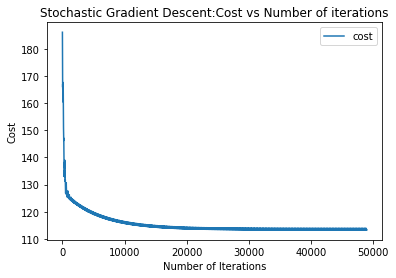

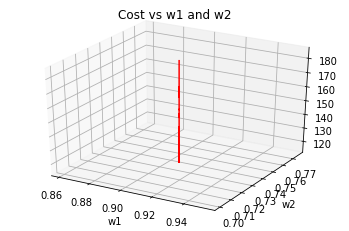


MSE = 40.02908768954276


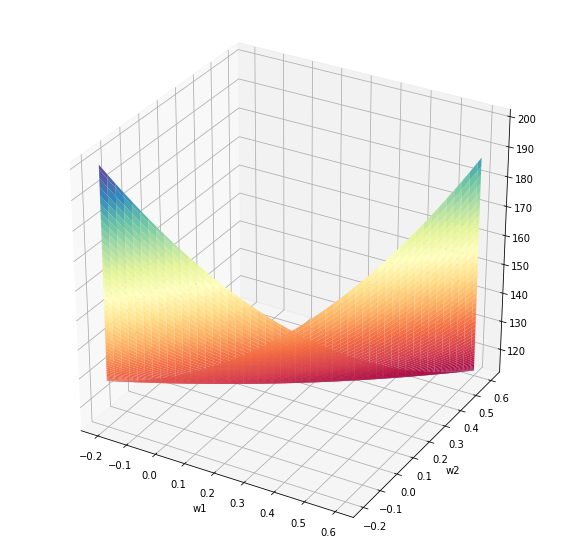

In [5]:
# function to perform stochastic gradient descent

def stochastic_gradient_descent(X, Y, learning_rate = 0.001 , iteration=500):
  np.random.seed(15)
  weight = np.random.random((X.shape[1], 1)) 
  cost_list = [] 

  w0 = []
  w1 = []
  w2 = [] 

  for i in range(iteration):
    for j in range(len(X)):
      w0.append(weight[0])
      w1.append(weight[1])
      w2.append(weight[2])
      cost_list.append(cost(X, Y, weight))

      hyp = hypothesis(X,weight)

      weight[0] = weight[0] - learning_rate * (hyp[j] - Y[j])
      weight[1] = weight[1] - learning_rate * (hyp[j] - Y[j])*X[j,1]
      weight[2] = weight[2] - learning_rate * (hyp[j] - Y[j])*X[j,2]
              
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling stochastic gradient descent function
weight , cost_list , w0 , w1 , w2 = stochastic_gradient_descent(X_train_normalised , Y_train_normalised ,iteration=200) 
LR_sgd = weight

# Final Cost after linear regression using mini batch gradient descent
print("The final cost function value after applying linear regression using Stochastic gradient descent = " +str(cost(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iterations
plt.plot(np.array(cost_list) , label = "cost")
plt.title("Stochastic Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_LR_sgd = mse(Y_pred , Y_test)
print ("\nMSE = " + str(mse_LR_sgd))


#Surface plot
#Taking weights at uniform interval with range upto 100

w1 = np.linspace(-0.2, 0.6, 100)
w2 = np.linspace(-0.2, 0.6, 100)
J_v = np.zeros((w1.shape[0],w2.shape[0]))

for i in range(100):
  for j in range(100):
    t=np.array([0,w1[i],w2[j]])
    t=t.reshape(3,1)
    J_v[i][j]=cost(X_train_normalised,Y_train_normalised,t)

fig = plt.figure(figsize =(10, 10)) 
ax = plt.axes(projection ='3d') 
ax.plot_surface(w1,w2, J_v,cmap = "Spectral")
plt.ylabel('w2')
plt.xlabel('w1')
plt.show()

**3. Implement the ridge regression problem by considering batch, mini-batch and stochastic
gradient descent algorithms. (a) Plot the cost function vs the number of iterations for all
three cases. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf graph for
all three cases. (c) Evaluate the mean square error between the actual test output and
predicted test output. Please use the same data files as in question number 1 (Use for or
while loop for the implementation).**

The final cost function value after applying ridge regression using batch gradient descent = 113.48112629190102


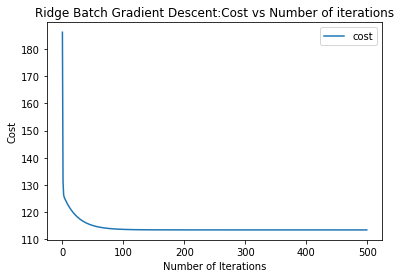

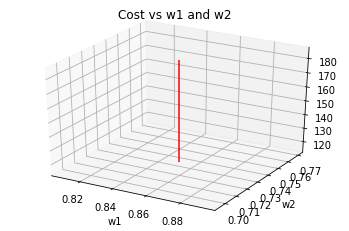

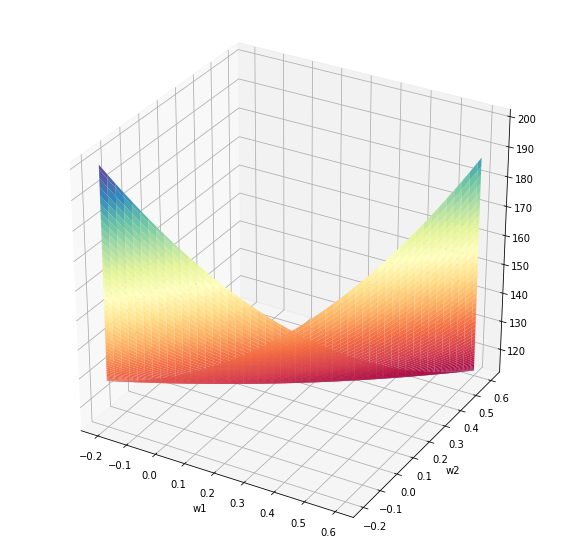


MSE = 40.36145151872418


In [6]:
# function to perform ridge regression for batch gradient descent

def ridge_batch_gradient_descent(X, Y, learning_rate = 0.001 , iteration=500 , lmbda=0.25):

  np.random.seed(15)
  weight = np.random.random((X.shape[1],1)) 

  cost_list = []
  w0 = []
  w1 = []
  w2 = [] 
  
  for i in range(iteration):
    w0.append(weight[0])
    w1.append(weight[1])
    w2.append(weight[2])
    cost_list.append(cost_ridge(X, Y, weight , lmbda))

    sum_temp = sum(X,Y,weight)

    weight[0] = (1-learning_rate*lmbda)*weight[0] - learning_rate * sum_temp[0]
    weight[1] = (1-learning_rate*lmbda)*weight[1] - learning_rate * sum_temp[1]
    weight[2] = (1-learning_rate*lmbda)*weight[2] - learning_rate * sum_temp[2] 

  
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling ridge batch gradient descent function
weight , cost_list , w0 , w1 , w2 = ridge_batch_gradient_descent(X_train_normalised , Y_train_normalised)
ridge_bgd = weight 

# Final Cost after ridge regression using batch gradient descent
print("The final cost function value after applying ridge regression using batch gradient descent = " +str(cost_ridge(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iteration
plt.plot(np.array(cost_list) , label = "cost")
plt.title("Ridge Batch Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()


#Surface plot
#Taking weights at uniform interval with range upto 100

w1 = np.linspace(-0.2, 0.6, 100)
w2 = np.linspace(-0.2, 0.6, 100)
J_v = np.zeros((w1.shape[0],w2.shape[0]))

for i in range(100):
  for j in range(100):
    t=np.array([0,w1[i],w2[j]])
    t=t.reshape(3,1)
    J_v[i][j]=cost(X_train_normalised,Y_train_normalised,t)

fig = plt.figure(figsize =(10, 10)) 
ax = plt.axes(projection ='3d') 
ax.plot_surface(w1,w2, J_v,cmap = "Spectral")
plt.ylabel('w2')
plt.xlabel('w1')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_ridge_bgd = mse(Y_pred , Y_test)

print ("\nMSE = " + str(mse_ridge_bgd))

The final cost function value after applying ridge regression using mini batch gradient descent = 114.02514514691433


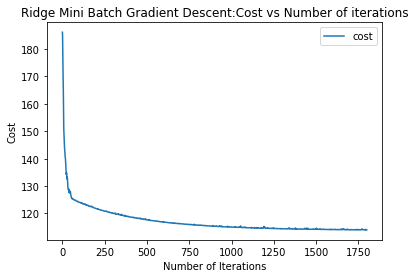

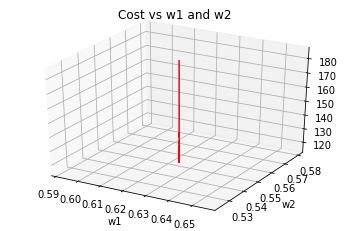

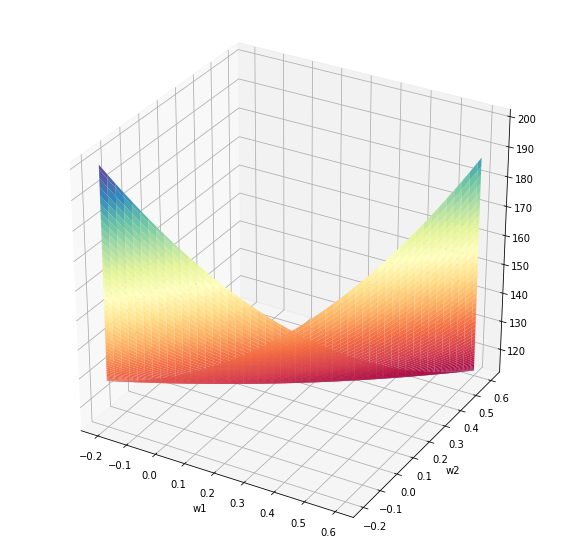

MSE = 42.125954842270225


In [7]:
# function to perform ridge regression for mini batch gradient descent

def ridge_mini_batch_gradient_descent(X, Y, learning_rate = 0.001 , iteration=50 , batch_size = 32 ,lmbda=0.25):
  np.random.seed(15)
  weight = np.random.random((X.shape[1], 1)) 
  cost_list = [] 

  w0 = []
  w1 = []
  w2 = [] 

  for i in range(iteration):
    mini_batches = create_mini_batches(X, Y, batch_size)

    for mini_batch in mini_batches:
      X_mini, Y_mini = mini_batch
      w0.append(weight[0])
      w1.append(weight[1])
      w2.append(weight[2])
      cost_list.append(cost_ridge(X, Y, weight , lmbda))

      sum_temp = sum(X_mini,Y_mini,weight)

      weight[0] = (1-learning_rate*lmbda)*weight[0] - learning_rate * sum_temp[0]
      weight[1] = (1-learning_rate*lmbda)*weight[1] - learning_rate * sum_temp[1]
      weight[2] = (1-learning_rate*lmbda)*weight[2] - learning_rate * sum_temp[2]  
              
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling ridge mini batch gradient descent function
weight , cost_list , w0 , w1 , w2 = ridge_mini_batch_gradient_descent(X_train_normalised , Y_train_normalised ,iteration=100 , batch_size= 15)
ridge_mbgd = weight

# Final Cost after ridge regression using mini batch gradient descent
print("The final cost function value after applying ridge regression using mini batch gradient descent = " +str(cost_ridge(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iterations
plt.plot(np.array(cost_list) , label = "cost")
plt.title("Ridge Mini Batch Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()


#Surface plot
#Taking weights at uniform interval with range upto 100

w1 = np.linspace(-0.2, 0.6, 100)
w2 = np.linspace(-0.2, 0.6, 100)
J_v = np.zeros((w1.shape[0],w2.shape[0]))

for i in range(100):
  for j in range(100):
    t=np.array([0,w1[i],w2[j]])
    t=t.reshape(3,1)
    J_v[i][j]=cost(X_train_normalised,Y_train_normalised,t)

fig = plt.figure(figsize =(10, 10)) 
ax = plt.axes(projection ='3d') 
ax.plot_surface(w1,w2, J_v,cmap = "Spectral")
plt.ylabel('w2')
plt.xlabel('w1')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_ridge_mbgd = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_ridge_mbgd))

The final cost function value after applying ridge regression using Stochastic gradient descent = 119.53892557717975


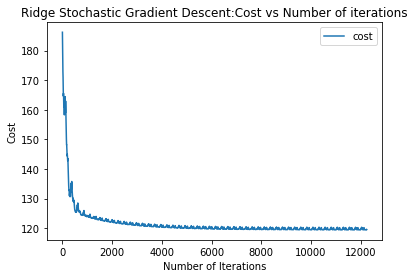

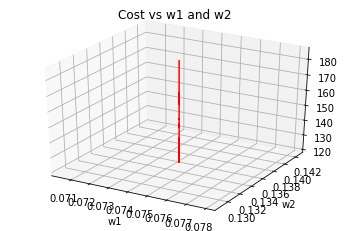

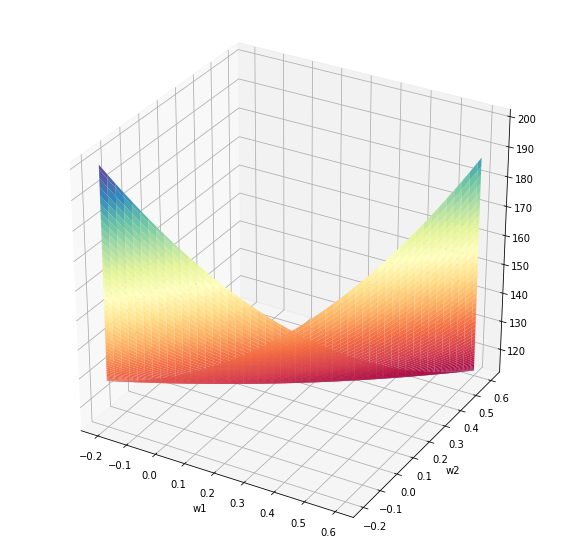

MSE =  48.32238265537296


In [8]:
# function to perform ridge regression for stochastic gradient descent

def ridge_stochastic_gradient_descent(X, Y, learning_rate = 0.001 , iteration=500 ,lmbda=0.25):
  np.random.seed(15)
  weight = np.random.random((X.shape[1], 1)) 
  cost_list = [] 

  w0 = []
  w1 = []
  w2 = [] 

  for i in range(iteration):
    for j in range(len(X)):
      w0.append(weight[0])
      w1.append(weight[1])
      w2.append(weight[2])
      cost_list.append(cost_ridge(X, Y, weight,lmbda))

      hyp = hypothesis(X,weight)

      weight[0] = (1-learning_rate*lmbda)*weight[0] - learning_rate * (hyp[j] - Y[j])
      weight[1] = (1-learning_rate*lmbda)*weight[1] - learning_rate * (hyp[j] - Y[j])*X[j,1]
      weight[2] = (1-learning_rate*lmbda)*weight[2] - learning_rate * (hyp[j] - Y[j])*X[j,2] 
              
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling ridge stochastic batch gradient descent function
weight , cost_list , w0 , w1 , w2 = ridge_stochastic_gradient_descent(X_train_normalised , Y_train_normalised ,iteration=50 ,lmbda =0.4 )
ridge_sgd = weight

# Final Cost after ridge regression using stochastic gradient descent
print("The final cost function value after applying ridge regression using Stochastic gradient descent = " +str(cost_ridge(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iterations
plt.plot(np.array(cost_list) , label = "cost")
plt.title("Ridge Stochastic Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()


#Surface plot
#Taking weights at uniform interval with range upto 100

w1 = np.linspace(-0.2, 0.6, 100)
w2 = np.linspace(-0.2, 0.6, 100)
J_v = np.zeros((w1.shape[0],w2.shape[0]))

for i in range(100):
  for j in range(100):
    t=np.array([0,w1[i],w2[j]])
    t=t.reshape(3,1)
    J_v[i][j]=cost(X_train_normalised,Y_train_normalised,t)

fig = plt.figure(figsize =(10, 10)) 
ax = plt.axes(projection ='3d') 
ax.plot_surface(w1,w2, J_v,cmap = "Spectral")
plt.ylabel('w2')
plt.xlabel('w1')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_ridge_sgd = str(mse(Y_pred , Y_test))
print ("MSE = ",mse_ridge_sgd)

**4. Derive the least angle regression (LAR) weight update rule. Clearly show all steps (cost
function of LAR, evaluation of the derivative of the cost function, and weight update rule).
Upload the derivations of this question in the assignment 1 part of the Google classroom.**

![picture](https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/Q4%20Derivation.jpg)

**4. Implement Least angle regression to estimate the weight parameters for the feature
matrix (X) and the class label vector (y) by considering batch, mini-batch and stochastic
gradient descent-based algorithms. (a) Plot the cost function vs the number of iterations for
all three cases. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf graph for
all three cases. (c) Evaluate the mean square error between the actual test output and
predicted test output. Please use the same data files as in question number 1 (Use for or
while loop for the implementation).**

The final cost function value after applying LAR using batch gradient descent = 113.72248487857246


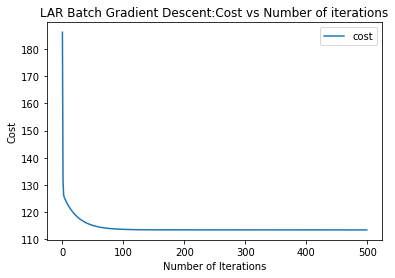

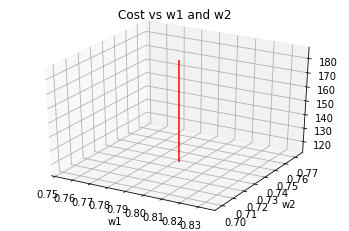

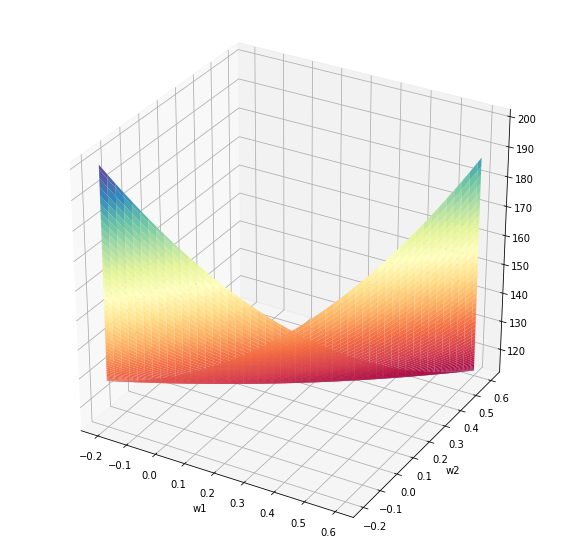

MSE = 40.36405013471351


In [9]:
# function to perform LAR for batch gradient descent

def LAR_batch_gradient_descent(X, Y, learning_rate = 0.001 , iteration=500 , lmbda=0.25):

  np.random.seed(15)
  weight = np.random.random((X.shape[1],1)) 

  cost_list = []
  w0 = []
  w1 = []
  w2 = [] 
  
  for i in range(iteration):
    w0.append(weight[0])
    w1.append(weight[1])
    w2.append(weight[2])
    cost_list.append(cost_ridge(X, Y, weight , lmbda))

    sum_temp = sum(X,Y,weight)

    weight[0] = (weight[0]-learning_rate*lmbda*np.sign(weight[0])) - learning_rate * sum_temp[0]
    weight[1] = (weight[1]-learning_rate*lmbda*np.sign(weight[1])) - learning_rate * sum_temp[1]
    weight[2] = (weight[2]-learning_rate*lmbda*np.sign(weight[2])) - learning_rate * sum_temp[2] 

  
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)
# calling LAR batch gradient descent function
weight , cost_list , w0 , w1 , w2 = LAR_batch_gradient_descent(X_train_normalised , Y_train_normalised)
lar_bgd = weight

# Final Cost after linear regression using LAR batch gradient descent
print("The final cost function value after applying LAR using batch gradient descent = " +str(cost_LAR(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iteration
plt.plot(np.array(cost_list) , label = "cost")
plt.title("LAR Batch Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()


#Surface plot
#Taking weights at uniform interval with range upto 100

w1 = np.linspace(-0.2, 0.6, 100)
w2 = np.linspace(-0.2, 0.6, 100)
J_v = np.zeros((w1.shape[0],w2.shape[0]))

for i in range(100):
  for j in range(100):
    t=np.array([0,w1[i],w2[j]])
    t=t.reshape(3,1)
    J_v[i][j]=cost(X_train_normalised,Y_train_normalised,t)

fig = plt.figure(figsize =(10, 10)) 
ax = plt.axes(projection ='3d') 
ax.plot_surface(w1,w2, J_v,cmap = "Spectral")
plt.ylabel('w2')
plt.xlabel('w1')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_lar_bgd = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_lar_bgd))

The final cost function value after applying LAR using mini batch gradient descent = 114.91964108112032


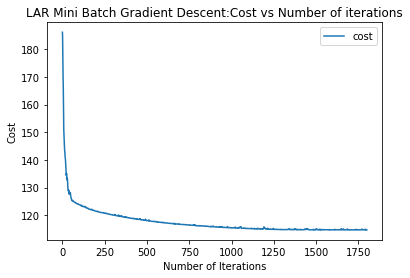

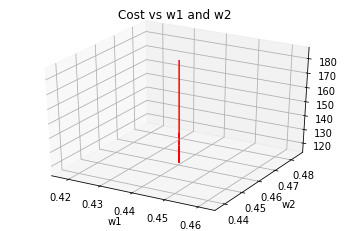

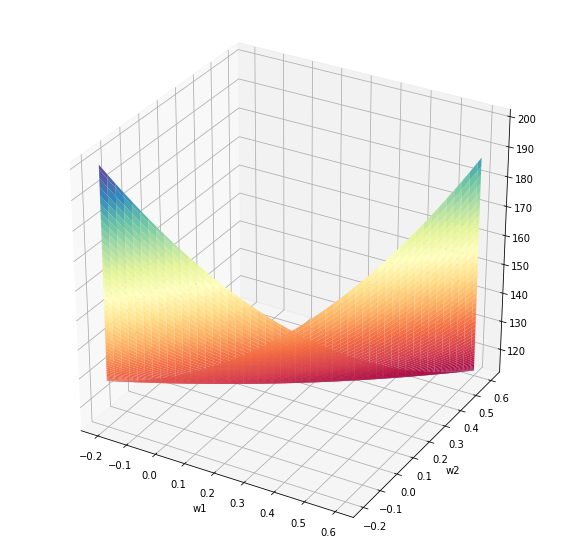

MSE = 43.87186977959823


In [10]:
# function to perform LAR for mini batch gradient descent

def LAR_mini_batch_gradient_descent(X, Y, learning_rate = 0.001 , iteration=50 , batch_size = 32 ,lmbda=0.25):
  np.random.seed(15)
  weight = np.random.random((X.shape[1], 1)) 
  cost_list = [] 

  w0 = []
  w1 = []
  w2 = [] 

  for i in range(iteration):
    mini_batches = create_mini_batches(X, Y, batch_size)

    for mini_batch in mini_batches:
      X_mini, Y_mini = mini_batch
      w0.append(weight[0])
      w1.append(weight[1])
      w2.append(weight[2])
      cost_list.append(cost_ridge(X, Y, weight , lmbda))

      sum_temp = sum(X_mini,Y_mini,weight)

      weight[0] = (weight[0]-learning_rate*lmbda*np.sign(weight[0])) - learning_rate * sum_temp[0]
      weight[1] = (weight[1]-learning_rate*lmbda*np.sign(weight[1])) - learning_rate * sum_temp[1]
      weight[2] = (weight[2]-learning_rate*lmbda*np.sign(weight[2])) - learning_rate * sum_temp[2] 
              
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling LAR mini batch gradient descent function
weight , cost_list , w0 , w1 , w2 = LAR_mini_batch_gradient_descent(X_train_normalised , Y_train_normalised ,iteration=100 , batch_size= 15)
lar_mbgd = weight

# Final Cost after linear regression using LAR mini batch gradient descent
print("The final cost function value after applying LAR using mini batch gradient descent = " +str(cost_LAR(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iteration
plt.plot(np.array(cost_list) , label = "cost")
plt.title("LAR Mini Batch Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()


#Surface plot
#Taking weights at uniform interval with range upto 100

w1 = np.linspace(-0.2, 0.6, 100)
w2 = np.linspace(-0.2, 0.6, 100)
J_v = np.zeros((w1.shape[0],w2.shape[0]))

for i in range(100):
  for j in range(100):
    t=np.array([0,w1[i],w2[j]])
    t=t.reshape(3,1)
    J_v[i][j]=cost(X_train_normalised,Y_train_normalised,t)

fig = plt.figure(figsize =(10, 10)) 
ax = plt.axes(projection ='3d') 
ax.plot_surface(w1,w2, J_v,cmap = "Spectral")
plt.ylabel('w2')
plt.xlabel('w1')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_lar_mbgd = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_lar_mbgd))

The final cost function value after applying LAR using Stochastic gradient descent = 122.7077803422182


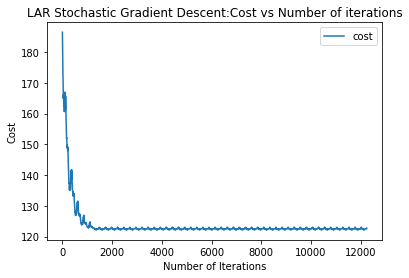

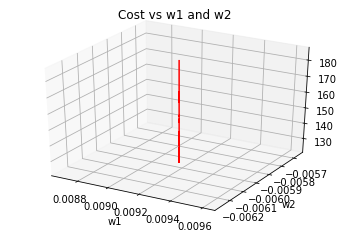

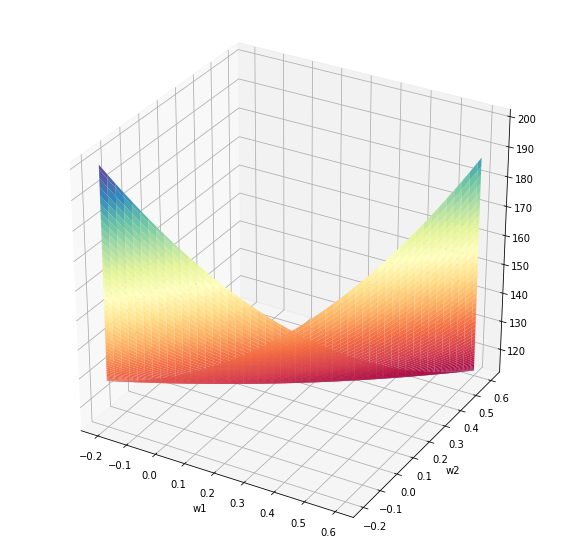

MSE = 49.00295706548366


In [11]:
# function to perform LAR for stochastic gradient descent

def LAR_stochastic_gradient_descent(X, Y, learning_rate = 0.001 , iteration=500 ,lmbda=0.25):
  np.random.seed(15)
  weight = np.random.random((X.shape[1], 1)) 
  cost_list = [] 

  w0 = []
  w1 = []
  w2 = [] 

  for i in range(iteration):
    for j in range(len(X)):
      w0.append(weight[0])
      w1.append(weight[1])
      w2.append(weight[2])
      cost_list.append(cost_LAR(X, Y, weight,lmbda))

      hyp = hypothesis(X,weight)

      weight[0] = (weight[0]-learning_rate*lmbda*np.sign(weight[0])) - learning_rate * (hyp[j] - Y[j])
      weight[1] = (weight[1]-learning_rate*lmbda*np.sign(weight[1])) - learning_rate * (hyp[j] - Y[j])*X[j,1]
      weight[2] = (weight[2]-learning_rate*lmbda*np.sign(weight[2])) - learning_rate * (hyp[j] - Y[j])*X[j,2] 
              
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling LAR stochastic batch gradient descent function
weight , cost_list , w0 , w1 , w2 = LAR_stochastic_gradient_descent(X_train_normalised , Y_train_normalised ,iteration=50 ,lmbda =0.4 )
lar_sgd = weight

# Final Cost after LAR using stochastic gradient descent
print("The final cost function value after applying LAR using Stochastic gradient descent = " +str(cost_LAR(X_train_normalised , Y_train_normalised , weight ,lmbda=0.25)))

# (a) Plotting Cost vs Number of iterations
plt.plot(np.array(cost_list) , label = "cost")
plt.title("LAR Stochastic Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()


#Surface plot
#Taking weights at uniform interval with range upto 100

w1 = np.linspace(-0.2, 0.6, 100)
w2 = np.linspace(-0.2, 0.6, 100)
J_v = np.zeros((w1.shape[0],w2.shape[0]))

for i in range(100):
  for j in range(100):
    t=np.array([0,w1[i],w2[j]])
    t=t.reshape(3,1)
    J_v[i][j]=cost(X_train_normalised,Y_train_normalised,t)

fig = plt.figure(figsize =(10, 10)) 
ax = plt.axes(projection ='3d') 
ax.plot_surface(w1,w2, J_v,cmap = "Spectral")
plt.ylabel('w2')
plt.xlabel('w1')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_lar_sgd = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_lar_sgd))

**5. Implement the vectorized linear regression, ridge regression and least angle regression
problems to evaluate the weight parameters for question number 1. Compare the weight
parameters of vectorization-based methods with the weights obtained using batch, minibatch and stochastic gradient descent-based algorithms. Please use the same data files as 
in question number 1. Evaluate the mean square error between the actual test output and
predicted test output.**

In [12]:
# Vectorisation based Linear Regression

def Vector_linear_regression(X,Y):
  weight = np.dot(np.dot(np. linalg. inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y)
  return weight

weight = Vector_linear_regression(X_train_normalised, Y_train_normalised)
LR_vec = weight

#Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_LR_vect = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_LR_vect))

print(weight)

MSE = 40.175608794378846
[[0.28476922]
 [1.02910301]
 [0.73492105]]


In [13]:
# Vectorisation based Ridge Regression

def Vector_ridge_regression(X,Y,lmbda=0.25):
  weight = np.dot(np.dot(np. linalg. inv(np.dot(np.transpose(X),X) + lmbda*np.eye(X.shape[1])) , np.transpose(X)),Y)
  return weight

weight = Vector_ridge_regression(X_train_normalised, Y_train_normalised)
ridge_vec = weight
#Mean squared error
Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_ridge_vect = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_ridge_vect))

print(weight)

MSE = 40.45029535316194
[[-0.06981754]
 [ 0.6677349 ]
 [ 0.73993378]]


In [14]:
# Vectorisation based Least Angle Regression

def Vector_LAR(X,Y,lmbda=0.25):
  weight = np.random.random((X.shape[1],1))
  weight = np.dot(np. linalg. inv(np.dot(np.transpose(X),X)) ,(np.dot(np.transpose(X),Y)-0.5*lmbda*np.sign(weight)))
  return weight

weight = Vector_LAR(X_train_normalised, Y_train_normalised)
lar_vec = weight

#Mean squared error
Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_lar_vect = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_lar_vect))

print(weight)

MSE = 40.52374731276184
[[-0.33415379]
 [ 0.4100708 ]
 [ 0.75474262]]


In [15]:
# Comparision Table
print("LINEAR REGRESSION ")
LR_table = [["W0",LR_vec[0],LR_bgd[0],LR_mbgd[0],LR_sgd[0]],["W1",LR_vec[1],LR_bgd[1],LR_mbgd[1],LR_sgd[1]],["W2",LR_vec[2],LR_bgd[2],LR_mbgd[2],LR_sgd[2]],["MSE",mse_LR_vect,mse_LR_bgd,mse_LR_mbgd,mse_LR_sgd]]
print(tabulate(LR_table,headers = ["Quantities","LR-Vectorized","LR-BGD","LR-MBGD","LR-SGD"],tablefmt="pretty"))
print("")
print(" ")
print(" ")

print("RIDGE REGRESSION")
ridge_table = [["W0",ridge_vec[0],ridge_bgd[0],ridge_mbgd[0],ridge_sgd[0]],["W1",ridge_vec[1],ridge_bgd[1],ridge_mbgd[1],ridge_sgd[1]],["W2",ridge_vec[2],ridge_bgd[2],ridge_mbgd[2],ridge_sgd[2]],["MSE",mse_ridge_vect,mse_ridge_bgd,mse_ridge_mbgd,mse_ridge_sgd]]
print(tabulate(ridge_table,headers = ["Quantities","Ridge-Vectorized","Ridge-BGD","Ridge-MBGD","Ridge-SGD"],tablefmt="pretty"))
print(" ")
print(" ")
print(" ")

print("LEAST ANGLE REGRESSION")
lar_table = [["W0",lar_vec[0],lar_bgd[0],lar_mbgd[0],lar_sgd[0]],["W1",lar_vec[1],lar_bgd[1],lar_mbgd[1],lar_sgd[1]],["W2",lar_vec[2],lar_bgd[2],lar_mbgd[2],lar_sgd[2]],["MSE",mse_lar_vect,mse_lar_bgd,mse_lar_mbgd,mse_lar_sgd]]
print(tabulate(lar_table,headers = ["Quantities","LAR-Vectorized","LAR-BGD","LAR-MBGD","LAR-SGD"],tablefmt="pretty"))


LINEAR REGRESSION 
+------------+--------------------+-------------------+--------------------+-------------------+
| Quantities |   LR-Vectorized    |      LR-BGD       |      LR-MBGD       |      LR-SGD       |
+------------+--------------------+-------------------+--------------------+-------------------+
|     W0     |    [0.28476922]    |   [0.16891538]    |    [0.20808962]    |    [0.1592038]    |
|     W1     |    [1.02910301]    |   [0.91397234]    |    [0.85155039]    |   [0.90701503]    |
|     W2     |    [0.73492105]    |   [0.73937752]    |    [0.62593206]    |   [0.73786383]    |
|    MSE     | 40.175608794378846 | 40.22500756397695 | 40.939805097487614 | 40.02908768954276 |
+------------+--------------------+-------------------+--------------------+-------------------+

 
 
RIDGE REGRESSION
+------------+-------------------+-------------------+--------------------+-------------------+
| Quantities | Ridge-Vectorized  |     Ridge-BGD     |     Ridge-MBGD     |     Ridge-S

**6. Implement K-means clustering based unsupervised learning algorithm for the dataset
(“data2.xlsx”). Plot the estimated class labels vs features. Use the number of clusters as
K=3.**

[[5.21666667 3.64       1.47333333 0.28      ]
 [4.74166667 2.95416667 1.75416667 0.32916667]
 [6.31458333 2.89583333 4.97395833 1.703125  ]]


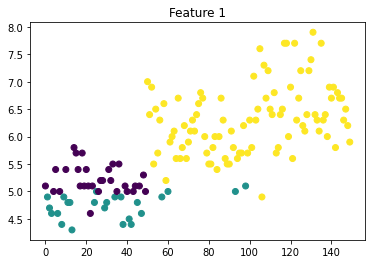

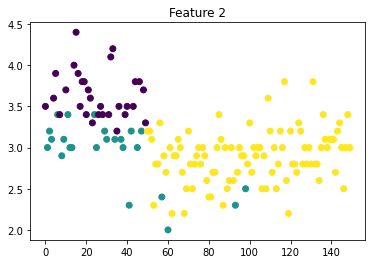

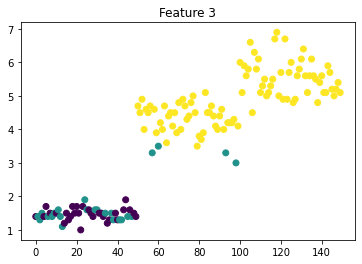

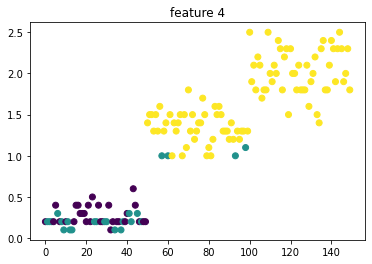

In [16]:
data2 = np.array(pd.read_csv("https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/data2.csv" , header= None))

#Method to find the euclidean distance between centroid and points 
def distance(item, centroid):
    return np.sqrt(np.sum((item-centroid)**2))

# Function to determine cluster based on Euclidean Distance
def cluster(item , centroids , k=3):
  dist = []
  for i in range(k):
    dist.append(distance(item,centroids[i]))
  return np.argmin(np.array(dist))

# Function for k means clustering

def K_Means_Cluster(X, k=3 , iteration = 1000):
  random_indices = np.random.choice(len(X), 3)
  centroids = X[random_indices]
  clusters = np.zeros(len(X))

  for itr in range(iteration):
    for i in range(len(X)):
      clusters[i] = cluster(X[i], centroids)
    for i in range(k):
      pts = [X[j] for j in range(len(X)) if clusters[j] == i]
      centroids[i] = np.mean(pts, axis = 0)

  return centroids, clusters

#Calling the function of K_Means_CLuster

centroids, clusters =  K_Means_Cluster(data2 , iteration= 3000)
print(centroids)

#Plotting the graphs seaprately for the respective features 
plt.figure()
plt.scatter(np.arange(len(data2)), data2[:, 0],c = clusters.flatten())
plt.title('Feature 1')
plt.show()
plt.figure()
plt.scatter(np.arange(len(data2)), data2[:, 1],c = clusters.flatten())
plt.title('Feature 2')
plt.show()
plt.figure()
plt.scatter(np.arange(len(data2)), data2[:, 2],c = clusters.flatten())
plt.title('Feature 3')
plt.show()
plt.figure()
plt.scatter(np.arange(len(data2)), data2[:, 3],c = clusters.flatten())
plt.title('feature 4')
plt.show()

**7. Implement the logistic regression algorithm for the binary classification using the
dataset (“data3.xlsx”). Divide the dataset into training and testing using hold-out crossvalidation technique with 60 % of instances as training and the remaining 40% as testing.
Evaluate the accuracy, sensitivity and specificity values for the binary classifier.**

In [17]:
def sigmoid(x, theta):
    z= np.dot(x, theta)
    return 1/(1+np.exp(-z))

def hypothesis(theta, x):
    return sigmoid(x, theta)

def cost_function(theta, x, y):
    m = x.shape[0]
    h = hypothesis(theta, x)
    return -(1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))

def gradient(theta, x, y):
    m = x.shape[0]
    h = hypothesis(theta, x)
    return (1/m) * np.dot(x.T, (h-y))

In [18]:
data3 = np.array(pd.read_csv("https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/data3.csv" , header= None))
data3 = np.concatenate((np.ones(shape = (data3.shape[0],1)),data3) ,axis = 1)
data3 = pd.DataFrame(data3)
data3.columns = ['x0', 'x1', 'x2', 'x3', 'x4', 'y']

#Normalization
data3.iloc[ :,1:-1] = (data3.iloc[ :,1:-1] - data3.iloc[ :,1:-1].mean()) / data3.iloc[ :,1:-1].std()

#True Classes
data3.iloc[ :,-1] = data3.iloc[ :,-1] - 1

data_train = data3.sample(frac=0.6 , random_state= 1)
data_test = data3.drop(data_train.index)

X_train = np.array(data_train.iloc[:,:-1])
Y_train = np.array(data_train.iloc[:,-1]).reshape((-1, 1)) 

X_test = np.array(data_test.iloc[:,:-1])
Y_test = np.array(data_test.iloc[:,-1]).reshape((-1, 1)) 

def binary_classifier( X , Y , iteration = 500 , learning_rate = 0.2):
  theta = np.random.random((X.shape[1],1))

  for i in range(iteration):
    theta = theta - learning_rate*gradient(theta , X ,Y)
    
  return np.array(theta)

theta = binary_classifier(X_train , Y_train)
theta

# Evaluating Test Set
hyp = hypothesis(theta , X_test)

#True positives , False positives , true negatives , False negatives
tp, fp, tn, fn = 0, 0, 0, 0
for i in range(len(Y_test)):
  if (hyp[i] > 0.5):
    label = 1
  else :
    label = 0
    
  if(label == Y_test[i]):
    if(label == 0):
       tn += 1
    else:
      tp += 1
  else:
    if(label == 0):
      fn += 1
    else:
      fp += 1

print("True positivie: ",tp)
print("True negative: ",tn)
print("False positivie: ",fp)
print("False negative: ",fn)
accuracy = (tp+tn) / (tp+tn+fp+fn)
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp )

print( "\nAccuracy     = " , accuracy)
print("Sensitivity  = " , sensitivity)
print("Specificity  = ",specificity)

True positivie:  18
True negative:  22
False positivie:  0
False negative:  0

Accuracy     =  1.0
Sensitivity  =  1.0
Specificity  =  1.0


**8. Implement the multiclass logistic regression algorithm using both “One VS All” and
“One VS One” multiclass coding techniques. Evaluate the performance of the multiclass
classifier using individual class accuracy and overall accuracy measures. Use the hold-out
cross-validation approach (60% training and 40% testing) for the selection of training and
test instances. (Please use the dataset “data4.xlsx”)**

**One vs All**

In [19]:
def loss(h, y):
    return (y * np.log(h) + (1 - y) * np.log(1 - h)).mean()
def gradient_descent(X, h, y):
    return np.dot(np.transpose(X), (h-y)) / y.shape[0]
def update_weight_loss(weight, alpha, gradient):
    return weight - alpha * gradient 
def sigmoid(X, weight):
    z = X.dot(weight)
    h=1.0 / (1.0 + np.exp(-z))
    return h     

In [20]:
df=pd.read_csv('https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/data4.csv',header=None)
#normalization using z-score
for i in range(df.shape[1]-1):
    df[i]=(df[i]-df[i].mean(axis=0))/df[i].std(axis=0)
np.random.seed(1)
train,test = np.split(df.sample(frac=1, random_state=10),[int(0.6 * len(df))])

train=np.array(train)#converting dataframe to numpy
test=np.array(test)

train_y=train[:,7]
train=np.delete(train,7,1)
test_y=test[:,7]
test=np.delete(test,7,1)

intercept = np.ones((train.shape[0], 1)) 
train_X = np.concatenate((intercept, train), axis=1)
intercept = np.ones((test.shape[0], 1)) 
test_X = np.concatenate((intercept, test), axis=1)
train_y=train_y.reshape(train_y.shape[0],1)

def train_func(train_X,train_y,n_iter,lr):
  w_all=[]
  for i in np.unique(train_y):
    y_ovr=np.where(train_y==i,1,0)
    w = np.random.random([train_X.shape[1],1])
    for j in range(n_iter):
      h = sigmoid(train_X, w)
      grad = gradient(w, train_X, y_ovr)
      w = update_weight_loss(w, lr, grad)
    w_all.append(w)

  return w_all

def predict(test_X,w):
  y_pred=np.zeros(test_X.shape[0])
  w=w.T
  for i in range(test_X.shape[0]):
    max=-1000
    for j in range(w.shape[1]):
      sig=sigmoid(test_X[i,:],w[:,j])
      if(max<sig):
        max=sig
        y_pred[i]=(j+1)

  return y_pred

w_all=train_func(train_X,train_y,3000,0.005)
w_all=np.array(w_all)
w_all=w_all.reshape(3,8)
print("Final weights obatined are:",w_all)

y_pred=predict(test_X,w_all)

confusion_matrix = pd.crosstab(test_y, y_pred)

confusion_matrix=np.array(confusion_matrix)
row_sum=0.0
all_sum=0.0
diag_sum=0.0

print("\n\n")

for i in range(confusion_matrix.shape[0]):
  row_sum=np.sum(confusion_matrix[i,:])
  all_sum +=row_sum
  acc=np.round(confusion_matrix[i,i]/row_sum,5)
  diag_sum+=confusion_matrix[i,i]
  print("Accuracy for class "+str(i+1)+" is",acc)

ov_acc=np.round((diag_sum/all_sum),5)
print("Overall Accuracy for the model is",ov_acc)

Final weights obatined are: [[-0.8908297  -0.31415774  0.70202396 -1.05893864 -1.05780848 -0.72586964
   0.75239318 -0.37677243]
 [-0.72155355  0.2598026  -0.36418885  0.75163368 -0.13848728 -0.56676533
  -0.68559284 -0.37296777]
 [-1.10702023  0.15751303  0.03792835  0.06007047  0.89245216  1.50684828
   0.26023071  0.58906684]]



Accuracy for class 1 is 1.0
Accuracy for class 2 is 0.83333
Accuracy for class 3 is 0.9
Overall Accuracy for the model is 0.91667


**One vs One**

In [21]:
df=pd.read_csv('https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/data4.csv',header=None)
#normalization using z-score
for i in range(df.shape[1]-1):
    df[i]=(df[i]-df[i].mean(axis=0))/df[i].std(axis=0)
train,test = np.split(df.sample(frac=1, random_state=10),[int(0.6 * len(df))])

train=np.asarray(train)
train_X=train[:,0:train.shape[1]-1]
train_y=train[:,train.shape[1]-1]

def create_class(train):
  class12=[]
  class13=[]
  class23=[]
  last=train.shape[1]-1
  for i in range(train.shape[0]):
    if train[i,last]!=3:
      class12.append(train[i,:])
    if train[i,last]!=2:
      class13.append(train[i,:])
    if train[i,last]!=1:
      class23.append(train[i,:])
  return class12,class13,class23

def logistic_regression(data,lr,n_iter):
  intercept = np.ones((data.shape[0], 1)) 
  data = np.concatenate((intercept, data), axis=1)
  y=data[0:data.shape[0],data.shape[1]-1].reshape(data.shape[0],1)
  u=np.unique(y)
  y=np.where(y==u[0],1,0)
  X=data[:,0:data.shape[1]-1]
  w = np.zeros([X.shape[1],1])
  for i in range(n_iter):
    h = sigmoid(X, w)
    gradient = gradient_descent(X, h, y)
    w = w-lr*gradient
  return w

class12,class13,class23=create_class(train)
class12=np.array(class12)
class13=np.array(class13)
class23=np.array(class23)

lr=0.05
n_iter=2000
w_ovo=[]
w_ovo.append(logistic_regression(class12,lr,n_iter))
w_ovo.append(logistic_regression(class13,lr,n_iter))
w_ovo.append(logistic_regression(class23,lr,n_iter))

w_ovo=np.array(w_ovo).reshape(3,8)
print("The final weight valuse are:\n",w_ovo)

def predict_ovo(test_X,w):
  y_pred_ovo=np.zeros(test_X.shape[0])
  Y=np.zeros([test_X.shape[0],3])
  w=w.T
  for i in range(test_X.shape[0]):
    for j in range(w.shape[1]):
      Y[i,j]=sigmoid(test_X[i,:],w[:,j])
      if j==0:
        Y[i,j]=np.where(Y[i,j]>0.5,1,2)
      elif j==1:
        Y[i,j]=np.where(Y[i,j]>0.5,1,3)
      else:
        Y[i,j]=np.where(Y[i,j]>0.5,2,3)
    y_pred_ovo[i]=int(stats.mode(Y[i,:]).mode)
  return y_pred_ovo

y_pred_ovo=predict_ovo(test_X,w_ovo)

confusion_ovo = pd.crosstab(test_y, y_pred_ovo)

print("\n\n")

confusion_ovo=np.array(confusion_ovo)
row_sum=0.0;
all_sum=0.0;
diag_sum=0.0
for i in range(confusion_ovo.shape[0]):
  row_sum=np.sum(confusion_ovo[i,:])
  all_sum +=row_sum
  acc=np.round(confusion_ovo[i,i]/row_sum,5);
  diag_sum+=confusion_ovo[i,i]
  print("Accuracy for class "+str(i+1)+" is ",acc)

ov_acc=np.round((diag_sum/all_sum),5)
print("Overall Accuracy for the model is ",ov_acc)


The final weight valuse are:
 [[-2.24415844 -1.14703424  1.1929233  -2.16283027 -1.8278804  -0.72806725
   1.05697508 -0.24317565]
 [-0.496674   -0.80648945  0.76076675 -1.40781137 -1.44290497 -1.30985168
   0.59952571 -0.62117673]
 [ 3.3155902   0.35354334  0.45280406 -0.96070804 -1.52326193 -3.42030092
   0.1825577  -0.91619184]]



Accuracy for class 1 is  1.0
Accuracy for class 2 is  0.94444
Accuracy for class 3 is  0.9
Overall Accuracy for the model is  0.95


**9. Evaluate the performance of multiclass logistic regression classifier using 5-fold crossvalidation approach. Evaluate the individual class accuracy and overall accuracy measures
for the multiclass classifier along each fold. (Please use the dataset “data4.xlsx”)**

In [22]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [23]:
def LogisticRegression(train, theta, alpha, class_label):
    #Preparing the training data ( separating from the class label )
    X = np.array(train.iloc[:, :-1])
    # Training class data 
    Y = np.array(train.iloc[:, -1])
    #    Making the classes other than wanted to 0 and the wanted to 1
    m = Y.shape[0]
    for i in range(len(Y)):
        if(Y[i] != class_label):
            Y[i] = 0
        else:
            Y[i] = 1
    for i in range(1000):
        #    Finding the value of z
        z = np.dot(X, theta)
        #    Putting it in the calculate the value of h(Z)
        h = sigmoid(z)
        #    Calculating the gradient 
        gradient = np.dot(X.T, (h-Y)) / m
        #    Updating the Theta values
        theta -= alpha * gradient
    return theta

def Accuracy(test, theta_1, theta_2, theta_3):
    accuracy, accuracy_1, accuracy_2, accuracy_3 = 0, 0, 0, 0
    m1, m2, m3 = 0, 0, 0
#    Preparing the testing X features
    X = np.array(test.iloc[:, :-1])
#    Preparing the testing Y label 
    Y = np.array(test.iloc[:, -1])
#    Finding the value z
    z1 = np.dot(X, theta_1)
    z2 = np.dot(X, theta_2)
    z3 = np.dot(X, theta_3)
#    Finding the values of h(Z) 
    h1 = sigmoid(z1)
    h2 = sigmoid(z2)
    h3 = sigmoid(z3)
    m = Y.shape[0]
    #Finding the class which the testing samples belong to : 
    for i in range(m):
        if(Y[i] == 1):
            m1 += 1
        elif(Y[i] == 2):
            m2 += 1
        else:
            m3 += 1

    for index in range(m):
#         the training sample belongs to that calss which has the highrst values
#        h value
        ans = max(h1[index], h2[index], h3[index])
        if(ans == h1[index]):
            a = 1
        elif(ans == h2[index]):
            a = 2
        elif(ans == h3[index]):
            a = 3
#            Calculating the accuracies
        if(a == Y[index]):
            accuracy += 1
            if(a == 1):
                accuracy_1 += 1
            elif(a == 2):
                accuracy_2 += 1
            elif(a == 3):
                accuracy_3 += 1
    return (accuracy_1/m1, accuracy_2/m2, accuracy_3/m3, accuracy/m)

#reading the file
data = pd.read_csv('https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/data4.csv', header = None )
# making the first as zeroes : 
data= np.concatenate((np.ones(shape = (data.shape[0],1)),data) ,axis = 1)
data = pd.DataFrame(data)

#normalization of data
norma = data.iloc[ :,1:-1]
data.iloc[ :,1:-1] = (norma - norma.mean() ) / norma.std()

#INtitializing random values to theta vector 
Theta = np.random.randn(1,8).ravel()
#taking the learning rate alpha
alpha = 0.01

#Randomizing the dataset 
data = data.sample(frac=1,random_state=random.randint(1,1000))

#THe size of each fold 
sz = int(len(data) * 0.2)

start, end, final_accuracy = 0, 0, 0
for i in range(5):
#    starting index
    start = i*sz
#    ending index 
    end = (i+1)*sz
    if(i == 4):
#        If its the last row do this 
        end = len(data)
#   Separating the train and the test sets 
    train = data.iloc[start:end, :]
    test = data.drop(train.index)
#    Making copies of theta ..
    T1= Theta.copy()
    T2= Theta.copy()
    T3= Theta.copy()
#    making copies of training sets 
    Tr1 = train.copy()
    Tr2 = train.copy()
    Tr3 = train.copy()
#    Finding the values thetas ...
    theta_1 = LogisticRegression(Tr1, T1,  alpha, 1)
    theta_2 = LogisticRegression(Tr2, T2,  alpha, 2)
    theta_3 = LogisticRegression(Tr3, T3,  alpha, 3)
# taking the values of accuracies into these variables 
    a1, a2, a3, a = Accuracy(test, theta_1, theta_2, theta_3)
    final_accuracy += a
# Printing the values of accuracies    
    print("Individual class accuracies for iteration {}: {}, {}, {}".format(i+1, a1, a2, a3))
    print("One vs All overall accuracy for iteration {}: {}".format(i+1, a))
final_accuracy /= 5
print("Average overall accuracy: {}".format(final_accuracy))


Individual class accuracies for iteration 1: 1.0, 0.868421052631579, 0.8809523809523809
One vs All overall accuracy for iteration 1: 0.9166666666666666
Individual class accuracies for iteration 2: 0.9743589743589743, 0.5476190476190477, 0.9487179487179487
One vs All overall accuracy for iteration 2: 0.8166666666666667
Individual class accuracies for iteration 3: 1.0, 0.5116279069767442, 0.9736842105263158
One vs All overall accuracy for iteration 3: 0.8166666666666667
Individual class accuracies for iteration 4: 0.975, 0.6585365853658537, 0.9487179487179487
One vs All overall accuracy for iteration 4: 0.8583333333333333
Individual class accuracies for iteration 5: 0.9761904761904762, 0.8333333333333334, 0.5714285714285714
One vs All overall accuracy for iteration 5: 0.7916666666666666
Average overall accuracy: 0.8400000000000001


**10. Use the likelihood ratio test (LRT) for the binary classification using the dataset
(“data3.xlsx”). Divide the dataset into training and testing using hold-out cross-validation
technique with 60 % of instances as training and the remaining 40% as testing. Evaluate
the accuracy, sensitivity and specificity values for the binary classifier.**

In [24]:
#reading the file 
data = pd.read_csv('https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/data3.csv', header = None )
data = pd.DataFrame(data)
norma = data.iloc[ :,1:-1]
#NORMALIZING THE FEATURE MATRIX
data.iloc[ :,1:-1] = (norma - norma.mean() ) / norma.std()

# Taking 60 % as training data and 40% as testing data 
train = data.sample(frac=0.6, random_state=random.randint(1,1000))
#droping the training samples from the data dataframe for the testing samples
test = data.drop(train.index)

#Introducing a label for the last column 
train.rename(columns={train.columns[-1]:'y'}, inplace=True)
test.rename(columns={test.columns[-1]:'y'}, inplace=True)

#Taking only the samples containing y = 1 as the y label 
t1 = train.loc[train['y'] == 1]
#Taking only the samples containing y = 1 as the y label 
t2 = train.loc[train['y'] == 2]
#Separating only the features 
train_l1 = t1.iloc[:, :4]
train_l2 = t2.iloc[:, :4]

#Calculating the prior probability for both the training sets 
prior_1 = (train_l1.shape[0])/train.shape[0]
prior_2 = (train_l2.shape[0])/train.shape[0]

#Calculating covariance for the calculation of apostreiori 
covariance_1 = np.cov(train_l1.T)
covariance_2 = np.cov(train_l2.T)

#Training matrix 
X_1 = np.matrix(train_l1.T)
X_2 = np.matrix(train_l2.T)

#calculating mean for the features which will help in the calculation of apostreiori 
mean_train1 = np.array(X_1.mean(1)).flatten()
mean_train2 = np.array(X_2.mean(1)).flatten()

#calculating the denominator for the formula used for the calculation of apostreiori 
denominator_1 = 1/(((2 * math.pi)**2) * ((np.linalg.det(covariance_1))**0.5))
denominator_2 = 1/(((2 * math.pi)**2) * ((np.linalg.det(covariance_2))**0.5))

#taking the test features
test_data_features = test.iloc[:, :4]

#True positives , False positives , true negatives , False negativesa
tp, fp, tn, fn = 0, 0, 0, 0
test_data_features.shape[0]
for i in range(test_data_features.shape[0]):
#    Taking the data point as a row in the test matrix
    test_data_point = np.array(test_data_features.iloc[i, :])
#    Calculating likelihood function value for the y = 1
    likelihood_1 = (denominator_1) * (math.exp((-0.5 * np.matmul(np.matmul((test_data_point - mean_train1), np.linalg.inv(covariance_1)),(test_data_point - mean_train1).T))))
#    Calculating likelihood function value for the y = 1
    likelihood_2 = (denominator_2) * (math.exp((-0.5 * np.matmul(np.matmul((test_data_point - mean_train2), np.linalg.inv(covariance_2)),(test_data_point - mean_train2).T))))
#    calculating the likelihood ratio 
    likelihood_ratio = likelihood_1 / likelihood_2
#   calculating the priori ratio 
    prior_ratio = prior_2/prior_1
#    If likelihood > priori ratio ; IT belongs to class 1 
#    It it is actually 1 ; true positives incerases by one 
#    else false positives increases by one 
#    Same with case of less than symbol 
#    But we use true negatives
    if(likelihood_ratio > prior_ratio):
        if(test.iloc[i, 4] == 1):
            tp += 1
        else:
            fp += 1
    else:
        if(test.iloc[i, 4] == 2):
            tn += 1
        else:
            fn += 1
#Printing the values of the accuracy
print(" Accuracy is    ",(tp+tn)/(tp+fp+tn+fn),"\n Sensitivity is ",tp/(tp+fn)," \n Specificity is ",tn/(tn+fp))

 Accuracy is     1.0 
 Sensitivity is  1.0  
 Specificity is  1.0


**11. Implement the Maximum a posteriori (MAP) decision rule for multiclass classification
task. Use the hold-out cross-validation approach (70% training and 30% testing) for the
selection of training and test instances. (Please use the dataset “data4.xlsx”)**

In [25]:
def likelihood_function(X, cov, mean):
    return ((1 / (np.power((2 * np.pi), X.shape[0] / 2) * np.sqrt(np.linalg.det(cov)))) * np.exp(-0.5 * (((X - mean)).dot((np.linalg.inv(cov)).dot((X - mean).T)))))

def mean(A): 
    m = []
    A=np.array(A)
    for i in range(A.shape[1]):
        m.append(np.sum(A[:,i])/len(A))
    return m

df=pd.read_csv('https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/data4.csv',header=None)
for i in range(df.shape[1]-1):
    df[i]=(df[i]-df[i].mean())/df[i].std()

train, test = np.split(df.sample(frac=1, random_state=10),[int(0.7 * len(df))])
train=np.asarray(train)
test=np.asarray(test)
train_X=train[:,0:train.shape[1]-1]
train_Y=train[:,train.shape[1]-1]
test_X=test[:,0:test.shape[1]-1]
test_Y=test[:,test.shape[1]-1]

def MAP(test_X,Py,mn,cov):
  res=[]
  for i in range(len(mn)):
    res.append(likelihood_function(test_X,cov[i],mn[i])*Py[i])
  return (np.argmax(res))

Py=[]
mn=[]
cov=[]
for j in np.unique(train_Y):
  Py.append(len([i for (i, val) in enumerate(train_Y) if val == j])/len(train_Y))
  x = np.array([train_X[i] for (i, val) in enumerate(train_Y) if val == j])
  mn.append(mean(x));
  cov.append(np.cov(x.T))
mn=np.array(mn)
cov=np.array(cov)

ypred=[]
for i in range(len(test_X)):
  ypred.append(MAP(test_X[i],Py,mn,cov)+1)

ypred=np.array(ypred)
df_confusion = pd.crosstab(test_Y, ypred)

df_confusion=np.array(df_confusion)
row_sum=0.0;
overall_sum=0.0;
dia_el=0.0
for i in range(df_confusion.shape[0]):
  row_sum=np.sum(df_confusion[i,:])
  overall_sum +=row_sum
  acc=np.round(df_confusion[i,i]/row_sum,5)*100;
  dia_el+=df_confusion[i,i]
  print("Accuracy for class "+str(i+1)+" is {}%\n".format(acc))

ov_acc=np.round((dia_el/overall_sum),5)*100
print("Overall Accuracy for the model is {}%\n".format(ov_acc))

print("\n Confusion Matrix\n", df_confusion)

Accuracy for class 1 is 100.0%

Accuracy for class 2 is 92.857%

Accuracy for class 3 is 92.857%

Overall Accuracy for the model is 95.556%


 Confusion Matrix
 [[17  0  0]
 [ 0 13  1]
 [ 0  1 13]]


**12. Implement the Maximum likelihood (ML) decision rule for multiclass classification
task. Use the hold-out cross-validation approach (70% training and 30% testing) for the
selection of training and test instances. (Please use the dataset “data4.xlsx”)**

In [26]:
def ML(test_X,mn,cov):
  res=[]
  for i in range(len(mn)):
    res.append(likelihood_function(test_X,cov[i],mn[i]))
  return (np.argmax(res))

def ML(test_X,mn,cov):
  res=[]
  for i in range(len(mn)):
    res.append(likelihood_function(test_X,cov[i],mn[i]))
  return (np.argmax(res))

ypred=np.array(ypred)
df_confusion = pd.crosstab(test_Y, ypred)
df_confusion

df_confusion=np.array(df_confusion)
row_sum=0.0;
overall_sum=0.0;
dia_el=0.0
for i in range(df_confusion.shape[0]):
  row_sum=np.sum(df_confusion[i,:])
  overall_sum +=row_sum
  acc=np.round(df_confusion[i,i]/row_sum,5)*100;
  dia_el+=df_confusion[i,i]
  print("Accuracy for class "+str(i+1)+" is {}%\n".format(acc))

ov_acc=np.round((dia_el/overall_sum),5)*100
print("Overall Accuracy for the model is {}%\n".format(ov_acc))

print("\n Confusion Matrix\n", df_confusion)

Accuracy for class 1 is 100.0%

Accuracy for class 2 is 92.857%

Accuracy for class 3 is 92.857%

Overall Accuracy for the model is 95.556%


 Confusion Matrix
 [[17  0  0]
 [ 0 13  1]
 [ 0  1 13]]


**13. Please write in your own words that what you have learned by solving the Assignment**


Practical Implementation of the following:-
1. Working with Pandas library for importing data, numpy library for math and array operations, and matplotlib for plotting
2. Linear regression algorithm, Analysis of the cost function and its relation with the weight parameters
3. Linear regression using stochastic and batch gradient descent methods
4. Least Angle Regression for Batch Gradient Descent , mini batch gradient descent and stochastic gradient descent
5. Ridge Regression for Batch Gradient Descent , mini batch gradient descent and stochastic gradient descent
6. Vectorized implementation of linear regression , Ridge Regression and least angle regression methods
7. Implementation of the unsupervised algorithm K-means Clustering and analysis of unsupervised learning algorithm
8. Logistic regression of classification problems
9. ‘’One vs all’’ and ‘’one vs one’’ algorithms for multiclass classification
10. Hold out cross validation and K-fold cross validation
11. Importance of Confusion matrix, accuracy, sensitivity and specificity for measuring the performance of a classification algorithm
12. Probabilistic classifiers ( LRT, MAP and ML )
113. We have seen that regularization methods were able to produce a lower value of cost function for a given number of iterations
14. Stochastic gradient descent method produced a noisy cost plot when compared to batch gradient descent method
15. Probabilistic classifiers are able to produce comparable results to logistic regression based methods in a lower amount of processing time
